# Weather


### Import Library

In [1]:
import pandas as pd
import numpy as np

### Read data

In [7]:
df = pd.read_csv('../assets/weather.csv')
df.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Hồ Chí Minh, Việt Nam",1/1/2019,28.0,24.0,26.1,29.6,24.0,26.6,18.9,64.9,...,6.3,4,NaN,2019-01-01T06:11:22,2019-01-01T17:41:39,0.83,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48894099999,48900099999,VVTS"
1,"Hồ Chí Minh, Việt Nam",1/2/2019,25.4,24.0,24.7,25.4,24.0,24.7,21.0,79.7,...,4.5,3,NaN,2019-01-02T06:11:46,2019-01-02T17:42:12,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48894099999,48900099999,VVTS"
2,"Hồ Chí Minh, Việt Nam",1/3/2019,30.6,23.4,27.1,34.1,23.4,28.9,21.7,72.9,...,13.3,6,NaN,2019-01-03T06:12:09,2019-01-03T17:42:45,0.90,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48894099999,48900099999,VVTS"
3,"Hồ Chí Minh, Việt Nam",1/4/2019,34.0,25.5,29.4,37.9,25.5,31.7,21.8,65.3,...,18.2,7,NaN,2019-01-04T06:12:32,2019-01-04T17:43:17,0.94,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"48894099999,48900099999,VVTS"
4,"Hồ Chí Minh, Việt Nam",1/5/2019,33.6,25.0,29.1,35.4,25.0,30.7,21.0,63.4,...,20.2,8,NaN,2019-01-05T06:12:54,2019-01-05T17:43:50,0.97,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48894099999,48900099999,VVTS"


### Processing data

In [ ]:
# Drop column can do model bias
df = df.drop(['name', 'preciptype', 'snow', 'snowdepth', 'severerisk', 'stations', 'icon', 'description'], axis=1)

In [11]:
pd.set_option('display.max_columns', None)
df.head(5)

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,1/1/2019,28.0,24.0,26.1,29.6,24.0,26.6,18.9,64.9,3.1,100,20.83,35.6,21.1,2.7,1012.2,59.8,10.3,72.0,6.3,4,2019-01-01T06:11:22,2019-01-01T17:41:39,0.83,"Rain, Partially cloudy"
1,1/2/2019,25.4,24.0,24.7,25.4,24.0,24.7,21.0,79.7,16.1,100,70.83,47.2,16.2,11.1,1011.7,61.5,9.4,52.4,4.5,3,2019-01-02T06:11:46,2019-01-02T17:42:12,0.87,"Rain, Partially cloudy"
2,1/3/2019,30.6,23.4,27.1,34.1,23.4,28.9,21.7,72.9,0.1,100,4.17,59.8,23.1,64.1,1011.9,58.6,10.1,154.4,13.3,6,2019-01-03T06:12:09,2019-01-03T17:42:45,0.90,"Rain, Partially cloudy"
3,1/4/2019,34.0,25.5,29.4,37.9,25.5,31.7,21.8,65.3,0.2,100,8.33,56.2,29.5,95.3,1012.5,43.4,10.3,209.4,18.2,7,2019-01-04T06:12:32,2019-01-04T17:43:17,0.94,"Rain, Partially cloudy"
4,1/5/2019,33.6,25.0,29.1,35.4,25.0,30.7,21.0,63.4,0.0,0,0.00,30.6,25.5,109.2,1012.3,32.6,10.3,233.9,20.2,8,2019-01-05T06:12:54,2019-01-05T17:43:50,0.97,Partially cloudy


conditions
Rain, Partially cloudy    1379
Partially cloudy           586
Rain, Overcast               6
Clear                        3
Name: count, dtype: int64


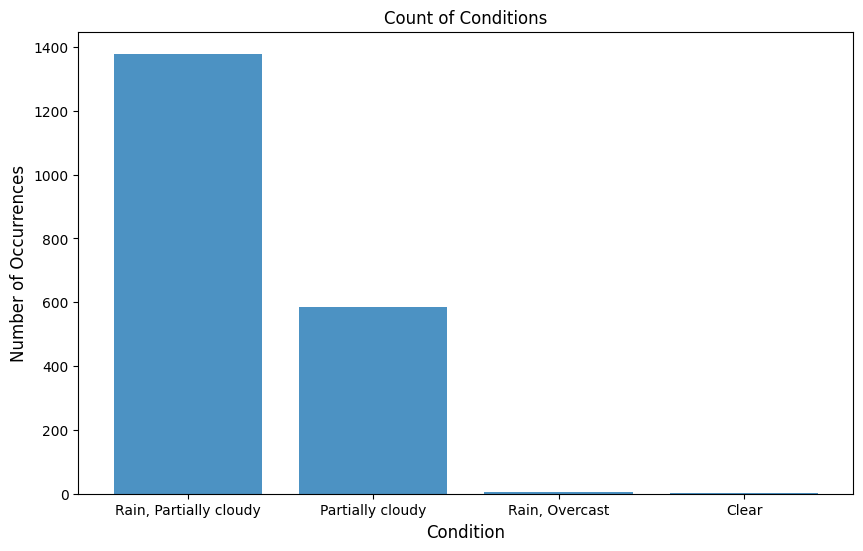

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each condition
condition_counts = df['conditions'].value_counts()
print(condition_counts)

# # Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(condition_counts.index, condition_counts.values, alpha=0.8)
plt.title('Count of Conditions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.show()

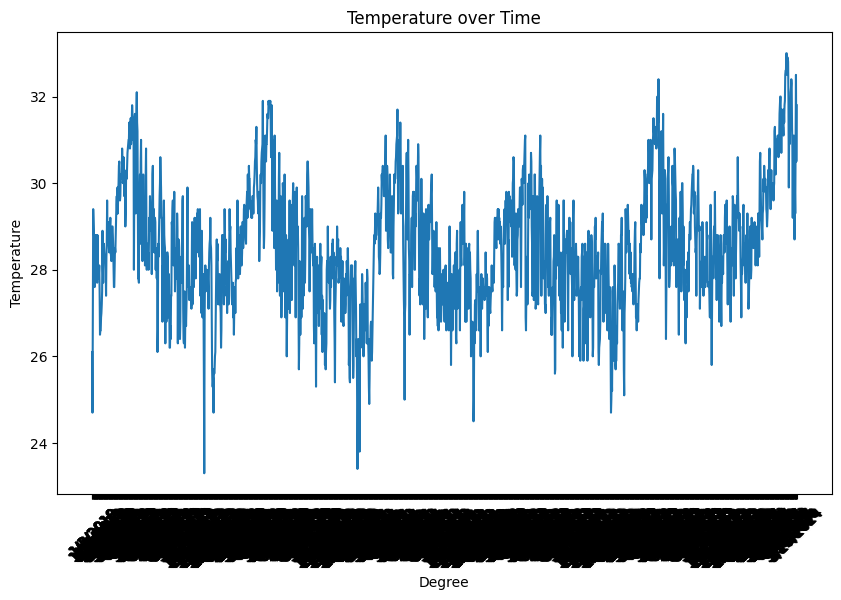

In [22]:
# Assuming 'datetime' and 'temp' are columns in your DataFrame df
plt.figure(figsize=(10,6))
plt.plot(df['datetime'], df['temp'])
plt.title('Temperature over Time')
plt.xlabel('Degree')  # Set x-label as 'Degree'
plt.ylabel('Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if they are actual datetime
plt.show()